# 시계열 분석 (Time Series)

* 시간 : 특정 간격을 가짐 (Lag)
    - Lag 에서 Data의 트렌드를 찾음
    
* 일변량 정상시계열
    - ARIMA

* Trend : 추세 
* Seasonality : 계절성
* Cycle : 주기
* Noise : White Noise

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='Malgun Gothic')

In [3]:
df1 = pd.read_csv('Data11.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [4]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [5]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


In [7]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [8]:
df1['Datetime'].describe()

<ipython-input-8-1eedf18d289e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Datetime'].describe()


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [9]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Week'] = df1['Datetime'].dt.week
df1['Day_of_week'] = df1['Datetime'].dt.day_name()

<ipython-input-9-093d56191f01>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['Week'] = df1['Datetime'].dt.week


In [10]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


In [ ]:
sns.lineplot(data=df1, x='Datetime', y='구매금액', estimator=sum)

In [16]:
p1 = pd.pivot_table(data=df1, index='Datetime', values='구매금액', aggfunc='sum').reset_index()

In [17]:
p1

,Datetime,구매금액
0,2018-04-20,100920
1,2018-05-06,26500
2,2018-05-14,20600
3,2018-08-12,75700
4,2018-09-01,48300
...,...,...
584,2020-08-03,27560340
585,2020-08-04,31832500
586,2020-08-05,27683180
587,2020-08-06,22574070


<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

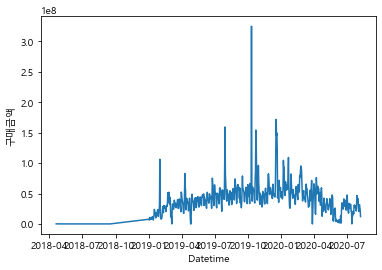

In [19]:
sns.lineplot(data=p1, x='Datetime', y='구매금액')

In [20]:
p2 = pd.pivot_table(data=df1, index=['Datetime','물품대분류'], values='구매금액', aggfunc='sum').reset_index()

<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

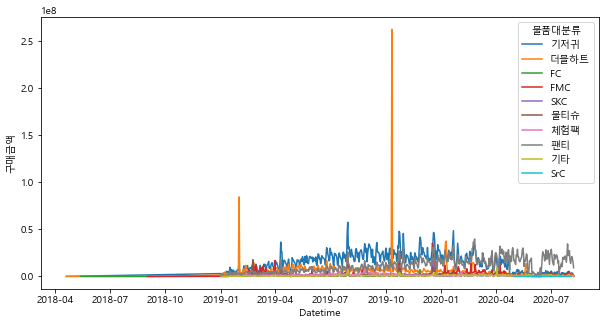

In [23]:
plt.figure(figsize=[10,5])
sns.lineplot(data=p2, x='Datetime', y='구매금액', hue='물품대분류')

In [26]:
df2 = df1.loc[(df1['Year']>= 2020) & (df1['물품대분류']=='기저귀')]
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
73,2020-03-05,52320,기저귀,2020-03-05,2020,3,10,Thursday
530,2020-07-09,99800,기저귀,2020-07-09,2020,7,28,Thursday
623,2020-07-02,49900,기저귀,2020-07-02,2020,7,27,Thursday
625,2020-08-04,49900,기저귀,2020-08-04,2020,8,32,Tuesday
662,2020-07-18,49900,기저귀,2020-07-18,2020,7,29,Saturday


**ARIMA (Auto Regressive Integrated Moving Average Model)**

* AR : Auto Regressive Model 자기 회귀 모델
    - p: 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 모델
    - ACF: 자기상관함수 / 특정 구간 내에 데이터간 상관관계
    - PACF: 부분자기상관함수 / 

* MA : Moving Average 이동 평균 모델
    - 일정한 구간 데이터의 평균을 계산해서 미래를 예측하는 모델
    
* Differnece : 차분

**ARIMA Model**

- 단기예측
- 계절적 변동 요인 (주기적 변동)
- Sample > 5
- 정성적 자료
    → 차분

In [29]:
import statsmodels.tsa.api as tsa

In [31]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
73,2020-03-05,52320,기저귀,2020-03-05,2020,3,10,Thursday
530,2020-07-09,99800,기저귀,2020-07-09,2020,7,28,Thursday
623,2020-07-02,49900,기저귀,2020-07-02,2020,7,27,Thursday
625,2020-08-04,49900,기저귀,2020-08-04,2020,8,32,Tuesday
662,2020-07-18,49900,기저귀,2020-07-18,2020,7,29,Saturday


In [44]:
df_time = pd.pivot_table(data=df2, index='Datetime', values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2020-01-01,17935180
2020-01-02,22963440
2020-01-03,21967800
2020-01-04,17095440
2020-01-05,17032880


In [45]:
y = df_time['구매금액'].resample('1D').mean()

In [46]:
#결측값이 있는지 확인
y.isnull().sum()

4

1. 결측값을 특정 값으로 채우기
    - df.fillna(0)
2. 결측값을 앞 방향 혹은 뒷 방향으로 채우기 
    - fillna(method='ffill' or 'pad'), fillna(method='bfill' or 'backfill')
3. 앞/뒤 방향으로 결측값 채우는 회수를 제한하기
    - fillna(method='ffill', limit=number), fillna(method='bfill', limit=number)

In [47]:
y1 = y.fillna(method = 'ffill')

### 시계열 분해
: 시계열에 영향을 주는 일반적 요인을 시계열에서 분리해 분석하는 방법
- 계절요인 Seasonal
- 추세요인 Trend
- 순환요인 Cyclical
- 불규칙요인 Irregular

In [50]:
from pylab import rcParams

rcParams['figure.figsize'] = 15,10 

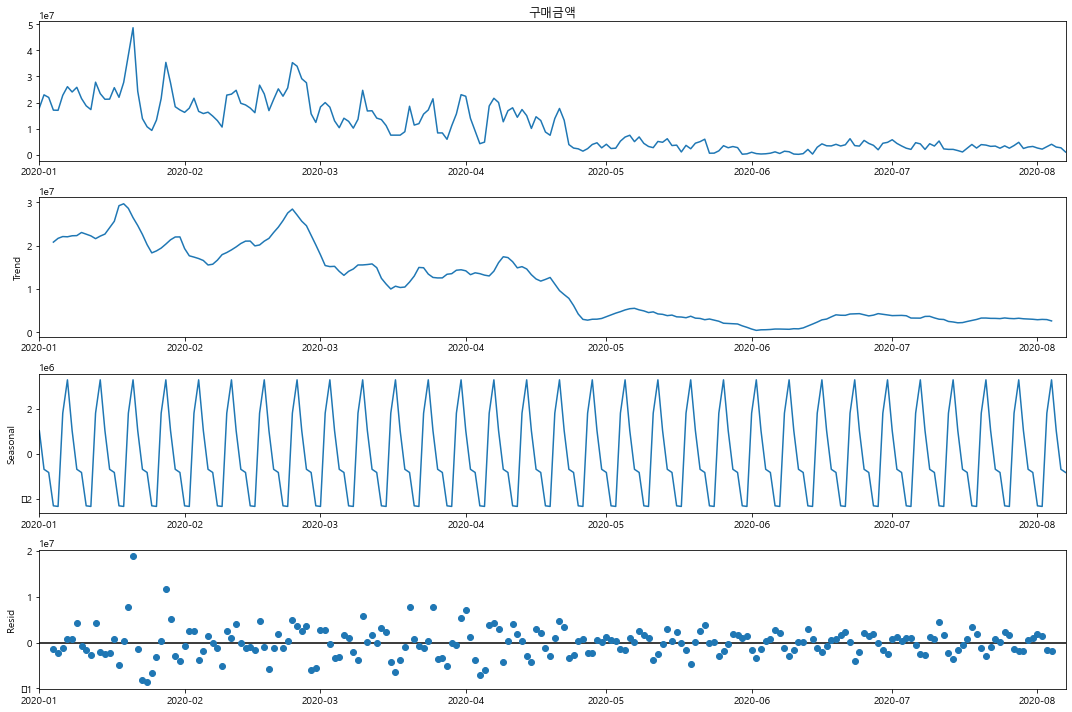

In [51]:
#시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model = 'additive')

#시각화
fig = model_series.plot()
plt.show()

In [52]:
import itertools

In [53]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [54]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [55]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [56]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [57]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y2,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [22]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

- **Likelihood (최대우도) : 특정 데이터가 모수로부터 추출되었을 가능도**
    - 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값) 
    
    
- **AIC (Akaike Information Criterion) : 데이터에 대한 모델의 상대적 품질**
    - AIC = -2 ln(L) + 2k 
    - 값이 낮을 수록 모형 적합도가 높은것을 의미 
    
    
- **BIC (Bayes Information Criterion)**
    - BIC = -2 ln(L) + log(n)p 
    - 변수가 더 많은 경우,  AIC에 더 많은 패널티를 부여해 계산 
    
    
- **HQIC (Hannan Quinn Information Criterion)**
    - HQIC = -2 ln(L) + 2k ln(ln(n))

In [23]:
ARIMA_list.sort_values(by='AIC').head(2)

,Parameter,Seasonal,AIC
27,"(0, 1, 1)","(0, 1, 1, 12)",3366.436238
31,"(0, 1, 1)","(1, 1, 1, 12)",3368.101408


In [24]:
mod = tsa.statespace.SARIMAX(y2,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  121
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1680.218
Date:                            Tue, 10 Aug 2021   AIC                           3366.436
Time:                                    11:57:04   BIC                           3374.066
Sample:                                04-22-2018   HQIC                          3369.518
                                     - 08-09-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6723      0.131     -5.113      0.000      -0.930      -0.415
ma.S.L12      -0.9497      0.096   

- Order (p,d,q), Seasonal Order (P,D,Q,M)
    - p : AR에서의 p값 (p 구간 내 데이터 사이의 상관관계)
    - d : 차분 
    - q : q MA PACF 편상관계수 q 값 
    - P 
    - D 
    - Q
    - M 
    
- Ljung - Box Test : 일정 기간동안 관측치가 랜덤이고, 독립적인지 여부를 검정 
    - 귀무 : 데이터가 상관관계를 나타내지 않는다. 
    - 대립 : 데이터가 상관관계를 나타낸다. 
    - P.value(귀무가설이 참일 확률) < 0.05 (유의수준) -> 대립가설 참  
    
- Jarque Bera Test : 왜도와 첨도가 정규분포와 일치하는지 가설검정 
    - SARIMAX : 잔차의 분포가 정규분포 인가 
    - 귀무 가설 : 해당 잔차(residual)는 정규분포와 일치한다.
    - 대립 가설 : 해당 잔차(residual)는 정규분포와 일치하지 않는다. 
    - P.value < 0.05 , 해당 잔차(residual)는 정규분포와 일치하지 않는다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


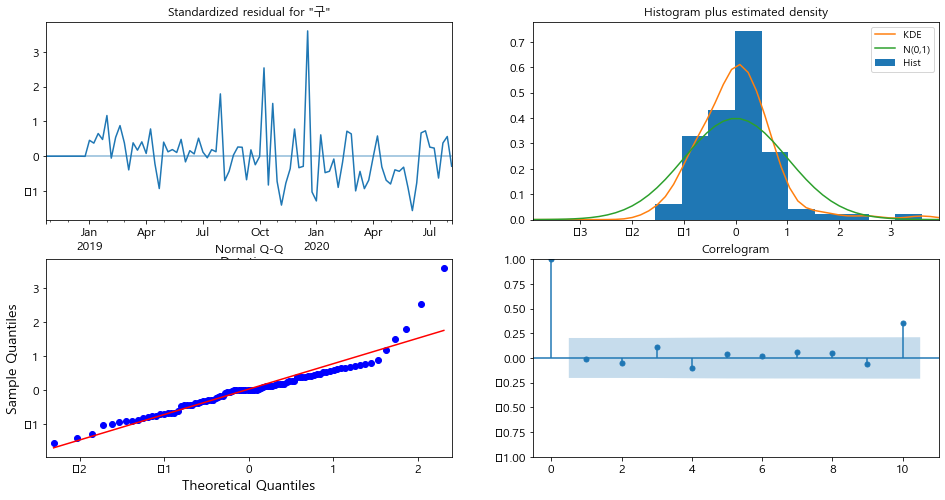

In [25]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [26]:
results.get_prediction()

In [27]:
y2.head()

Datetime
2018-04-22    100920.0
2018-04-29    100920.0
2018-05-06     26500.0
2018-05-13     26500.0
2018-05-20     20600.0
Freq: W-SUN, Name: 구매금액, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


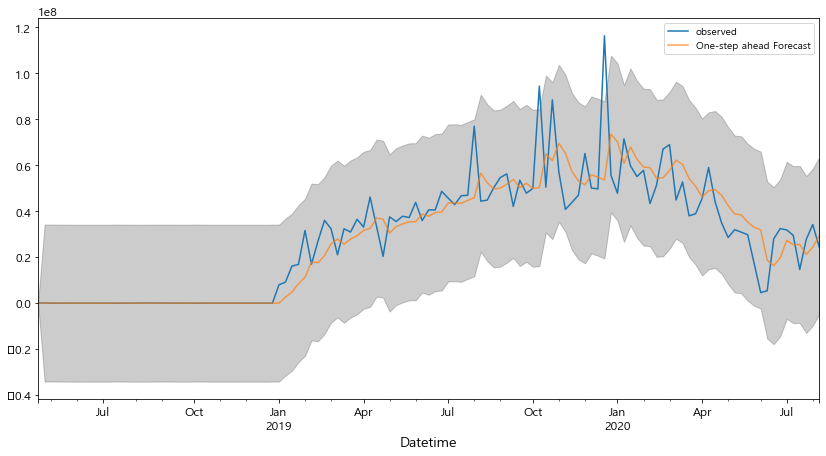

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2018-04-22'), dynamic=False)
pred_ci = pred.conf_int()

ax = y2.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2018-04-22'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,Datetime,predicted_mean
0,2018-04-22,0.000000e+00
1,2018-04-29,1.009200e+05
2,2018-05-06,1.009200e+05
3,2018-05-13,7.653510e+04
4,2018-05-20,6.014030e+04
...,...,...
116,2020-07-12,2.548850e+07
117,2020-07-19,2.560602e+07
118,2020-07-26,2.121060e+07
119,2020-08-02,2.437461e+07


In [30]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 179159545834941.9


In [33]:
pred_uc = results.get_forecast(steps=50)


In [35]:
pred_uc.predicted_mean

2020-08-16    2.697821e+07
2020-08-23    2.591803e+07
2020-08-30    2.907927e+07
2020-09-06    2.516438e+07
2020-09-13    2.810287e+07
2020-09-20    2.796149e+07
2020-09-27    3.120554e+07
2020-10-04    2.789200e+07
2020-10-11    2.599019e+07
2020-10-18    2.588329e+07
2020-10-25    2.715605e+07
2020-11-01    2.833677e+07
2020-11-08    2.775578e+07
2020-11-15    2.669560e+07
2020-11-22    2.985684e+07
2020-11-29    2.594195e+07
2020-12-06    2.888044e+07
2020-12-13    2.873906e+07
2020-12-20    3.198311e+07
2020-12-27    2.866957e+07
2021-01-03    2.676776e+07
2021-01-10    2.666086e+07
2021-01-17    2.793362e+07
2021-01-24    2.911434e+07
2021-01-31    2.853335e+07
2021-02-07    2.747317e+07
2021-02-14    3.063441e+07
2021-02-21    2.671953e+07
2021-02-28    2.965801e+07
2021-03-07    2.951663e+07
2021-03-14    3.276068e+07
2021-03-21    2.944714e+07
2021-03-28    2.754533e+07
2021-04-04    2.743843e+07
2021-04-11    2.871119e+07
2021-04-18    2.989191e+07
2021-04-25    2.931092e+07
2

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


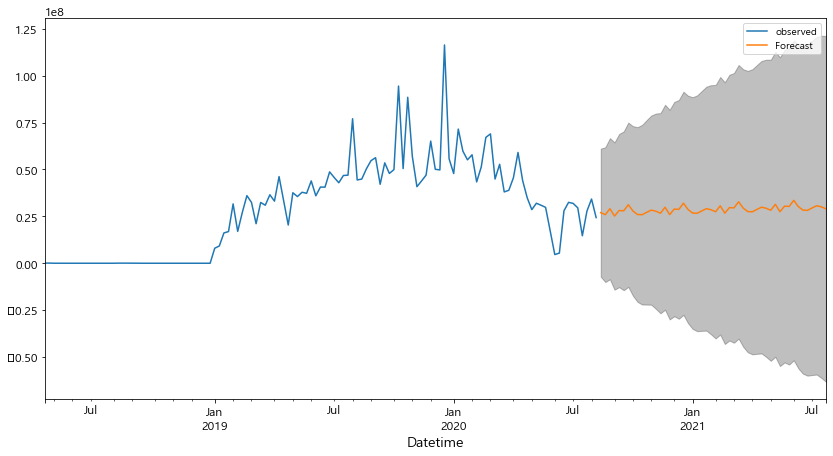

In [31]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

In [32]:
print('Done')

Done
